# Sistem Rekomendasi Film dengan TensorFlow
source: https://www.youtube.com/watch?v=6N2vo3JZg2c&list=PL3VpLbLyLE56IVsWwn_rlv9IGGNiyab9e&t=4127s

tahap dalam pembuatan sistem rekomendasi film:
1. Load dataset
2. Pisah data (train dan test)
3. Membuat model
4. Training model
5. Mencoba Model yang Telah Dibuat
5. Menyimpan model

### Import library untuk dataset

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load dataset

In [253]:
ratings = pd.read_csv('ratings.csv')
ratings.sample(20)

,movie_id,user_id,user_rating
54701,696,344,3.0
21955,508,79,3.0
2380,294,844,2.0
60071,952,286,2.0
64965,157,627,4.0
85779,288,78,4.0
33507,770,870,4.0
16579,928,880,2.0
60694,351,752,3.0
83805,22,468,5.0


In [255]:
movies = pd.read_csv('movies.csv')
#df2 = pd.read_csv('movies.csv')
movies.sample(20)

,movie_id,movie_title,movie_genres_str
1423,1424,I Like It Like That (1994),"[""Children's"", 'Documentary', 'Romance']"
627,628,Sleepers (1996),"['Comedy', 'Documentary']"
603,604,It Happened One Night (1934),"[""Children's""]"
1577,1578,"Collectionneuse, La (1967)",['Documentary']
1033,1034,"Quest, The (1996)","['unknown', 'Action']"
30,31,Crimson Tide (1995),"['Documentary', 'Thriller', 'Western']"
1409,1410,Harlem (1993),['Documentary']
383,384,Naked Gun 33 1/3: The Final Insult (1994),"[""Children's""]"
660,661,High Noon (1952),['unknown']
1658,1659,Getting Away With Murder (1996),"[""Children's""]"


jumlah film: 1682
jumlah user: 943

jumlah rating yang diberikan:
4.0    34174
3.0    27145
5.0    21201
2.0    11370
1.0     6110
Name: user_rating, dtype: int64


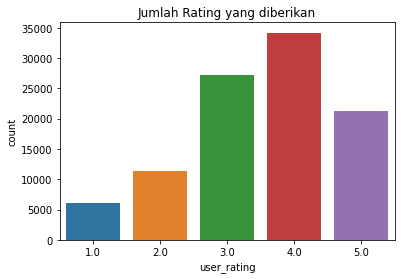

In [286]:
#melihat grafik jumlah rating yang diberikan 
jml_movie = movies['movie_id'].nunique()
jml_user = ratings['user_id'].nunique()
print("jumlah film:", jml_movie)
print("jumlah user:", jml_user)

sns.countplot(data=ratings, x='user_rating').set_title('Jumlah Rating yang diberikan')
print('\njumlah rating yang diberikan:')
print(ratings['user_rating'].value_counts())


informasi: 
- Data film sebanyak 1682 data, dengan 943 user
- Jumlah rating terbanyak adalah 4, dan paling sedikit adalah 1

### 2. Pisah data (train dan test)

In [258]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(ratings, test_size=0.2, random_state=42)

In [259]:
print("jumlah data train:", data_train.shape)
print("jumlah data test :", data_test.shape)

jumlah data train: (80000, 3)
jumlah data test : (20000, 3)


In [260]:
data_train

,movie_id,user_id,user_rating
75220,1016,109,5.0
48955,64,316,4.0
44966,89,200,5.0
13568,174,109,5.0
92727,204,788,3.0
...,...,...,...
6265,125,25,5.0
54886,156,704,3.0
76820,288,422,3.0
860,168,198,4.0


In [261]:
data_test

,movie_id,user_id,user_rating
75721,876,817,4.0
80184,580,83,4.0
19864,393,389,2.0
76699,54,774,1.0
92991,420,712,3.0
...,...,...,...
32595,144,823,5.0
29313,639,339,4.0
37862,222,763,5.0
53421,419,399,3.0


### 3. Membuat Model

dalam tensorflow model terdapat input layer, hidden layer, dan output layer

data masuk ke input layer, kemudian diolah oleh hidden layer, dan hasilnya akan keluar dari output layer

hasil yang dikeluarkan oleh output layer adalah nilai prediksi

In [262]:
#import tensorflow
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot #, Dense, Concatenate

#membuat input layer dari movie, jumlah input adalah 1
movie_input = Input(shape=[1])
#membuat input layer dari user, jumlah input adalah 1
user_input = Input(shape=[1])


#membuat embedding layer untuk movie
#semakin banyak size embedding, semakin banyak informasi yang dapat dikenali oleh model
#semakin banyak size embedding, model malah semakin menghafalkan data, bukan memahami data
embedding_size = 40
movie_embedding = Embedding(jml_movie+1, embedding_size)(movie_input)
user_embedding = Embedding(jml_user+1, embedding_size)(user_input)

#membuat flatten layer
#flatten layer bertujuan untuk mengubah bentuk data menjadi 1 dimensi
movie_flatten = Flatten()(movie_embedding)
user_flatten = Flatten()(user_embedding)

#membuat output layer
#output layer bertujuan untuk menghasilkan nilai rating
output = Dot(axes=1)([movie_flatten, user_flatten])

#membuat model
model = Model([movie_input, user_input], output)


In [263]:
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_25 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_26 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding_24 (Embedding)       (None, 1, 40)        67320       ['input_25[0][0]']               
                                                                                                  
 embedding_25 (Embedding)       (None, 1, 40)        37760       ['input_26[0][0]']               
                                                                                           

In [264]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam', loss='mse')

### 4. Training Model

In [265]:
#training model
history = model.fit(x=[data_train.movie_id, data_train.user_id], y=data_train.user_rating, 
                    validation_data=([data_test.movie_id, data_test.user_id], data_test.user_rating),
                    epochs=20, 
                    batch_size=128, 
                    verbose=1)

Epoch 1/20
625/625 [==============================] - 1s 2ms/step - loss: 11.9368 - val_loss: 5.4425
Epoch 2/20
625/625 [==============================] - 1s 2ms/step - loss: 2.2824 - val_loss: 1.2890
Epoch 3/20
625/625 [==============================] - 1s 2ms/step - loss: 1.0958 - val_loss: 1.0120
Epoch 4/20
625/625 [==============================] - 1s 1ms/step - loss: 0.9471 - val_loss: 0.9499
Epoch 5/20
625/625 [==============================] - 1s 1ms/step - loss: 0.9006 - val_loss: 0.9253
Epoch 6/20
625/625 [==============================] - 1s 1ms/step - loss: 0.8781 - val_loss: 0.9146
Epoch 7/20
625/625 [==============================] - 1s 1ms/step - loss: 0.8629 - val_loss: 0.9058
Epoch 8/20
625/625 [==============================] - 1s 1ms/step - loss: 0.8470 - val_loss: 0.8983
Epoch 9/20
625/625 [==============================] - 1s 1ms/step - loss: 0.8286 - val_loss: 0.8919
Epoch 10/20
625/625 [==============================] - 1s 2ms/step - loss: 0.8071 - val_loss: 0.881

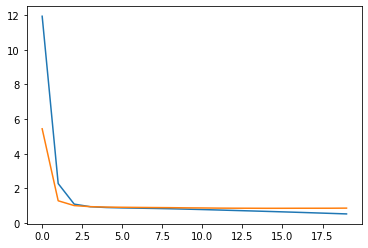

In [266]:
import matplotlib.pyplot as plt

losses = pd.DataFrame(history.history)
plt.plot(losses)

In [267]:
#evaluasi model
model.evaluate([data_test.movie_id, data_test.user_id], data_test.user_rating)

625/625 [==============================] - 1s 902us/step - loss: 0.8650


0.8650048971176147

### 5. Mencoba Model yang Telah Dibuat

In [294]:
import numpy as np
import matplotlib.pyplot as plt

def get_recommendations(user_id, movies, model):
  movies = movies.copy()
  user_ids = np.array([user_id] * len(movies))
  results = model([movies.movie_id.values, user_ids]).numpy().reshape(-1)

  movies['predicted_rating'] = pd.Series(results)
  movies = movies.sort_values('predicted_rating', ascending=False)

  print(f'Recommendations for user {user_id}')
  return movies

get_recommendations(5, movies, model).head(10)

Recommendations for user 5


,movie_id,movie_title,movie_genres_str,predicted_rating
49,50,Star Wars (1977),"['unknown', 'Action', 'Romance', 'Sci-Fi', 'We...",5.340258
180,181,Return of the Jedi (1983),"['unknown', 'Action', 'Romance', 'Sci-Fi', 'We...",5.027483
88,89,Blade Runner (1982),"['Fantasy', 'Sci-Fi']",5.000612
171,172,"Empire Strikes Back, The (1980)","['unknown', 'Action', 'Documentary', 'Romance'...",4.866308
168,169,"Wrong Trousers, The (1993)","['Adventure', ""Children's""]",4.750603
6,7,Twelve Monkeys (1995),"['Documentary', 'Sci-Fi']",4.691961
407,408,"Close Shave, A (1995)","['Adventure', ""Children's"", 'Thriller']",4.661039
1448,1449,Pather Panchali (1955),['Documentary'],4.583126
173,174,Raiders of the Lost Ark (1981),"['unknown', 'Action']",4.531476
1142,1143,Hard Eight (1996),"['Comedy', 'Thriller']",4.495310


### 6. Menyimpan Model

simpan model dengan format .h5

In [268]:
#model.save('model.h5')

simpan model dengan format .json,
jika gagal coba jalankan di google colaboratory

In [269]:
'''
from zipfile import ZipFile
import os

with ZipFile('tfjs_model.zip', 'w') as z:
  for filename in os.listdir('tfjs_model'): 
    filepath = os.path.join('tfjs_model', filename)
    z.write(filepath)
'''

"\nfrom zipfile import ZipFile\nimport os\n\nwith ZipFile('tfjs_model.zip', 'w') as z:\n  for filename in os.listdir('tfjs_model'): \n    filepath = os.path.join('tfjs_model', filename)\n    z.write(filepath)\n"